<center><h1>Singaravelou_Ritika_HW7</h1></center>

## Note : I have used two late days for this assignment. I have previously used two late days (one for HW3 and one for HW6).  I kindly request you to consider the same while evaluating my assignment and not deduct any marks. Thank you!

Name: Ritika Singaravelou
<br>
Github Username: ritika-singaravelou
<br>
USC ID: 6144091011

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold 
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, hamming_loss, silhouette_samples
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random
import os
import math
import warnings
warnings.filterwarnings('ignore')

### (a) Download the Anuran Calls (MFCCs) Data Set

#### Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [2]:
mfcc_df=pd.read_csv("../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")
mfcc_df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [3]:


samples_len = len(mfcc_df)
random.seed(samples_len)
train_indices = random.sample(range(samples_len),int(0.7*samples_len ) )
test_indices = []
for i in range(samples_len):
    if i not in train_indices:
        test_indices.append(i)

train_df = mfcc_df.iloc[train_indices, :].reset_index(drop=True)
print(train_df)
train_x = train_df.iloc[:, :22]
train_y_family = train_df['Family']
train_y_genus = train_df['Genus']
train_y_species = train_df['Species']






      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.377944  0.429383  0.601528  0.099087  0.000388 -0.062059   
1          1.0  0.632191  0.687750  0.402632 -0.007152  0.116553 -0.005369   
2          1.0  0.553265  0.434453  0.169304 -0.001479  0.190652  0.065757   
3          1.0  0.312874 -0.141600  0.306529  0.464158  0.191441 -0.212280   
4          1.0  0.412758  0.284958  0.590299  0.182816 -0.020608 -0.097203   
...        ...       ...       ...       ...       ...       ...       ...   
5031       1.0  0.687587  0.344193  0.525968  0.152937  0.036198 -0.063721   
5032       1.0  0.114143  0.137175  0.527703  0.266414  0.062074 -0.145242   
5033       1.0  0.076123  0.124052  0.415311  0.058236 -0.047065 -0.114241   
5034       1.0  0.533323  0.276118  0.469194  0.155438  0.098326 -0.024866   
5035       1.0 -0.094606  0.016582  0.312595  0.351775  0.042976 -0.080347   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MF

In [4]:
train_x

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.377944,0.429383,0.601528,0.099087,0.000388,-0.062059,0.113173,0.358851,0.034239,...,0.400357,-0.157761,-0.287083,0.126616,0.165731,-0.065993,-0.095989,-0.056341,0.082675,0.169519
1,1.0,0.632191,0.687750,0.402632,-0.007152,0.116553,-0.005369,0.166537,0.178722,-0.284436,...,-0.163635,-0.299060,0.235360,0.173003,-0.114398,0.016819,0.054743,0.096869,0.011300,-0.227317
2,1.0,0.553265,0.434453,0.169304,-0.001479,0.190652,0.065757,-0.078337,0.093723,0.083821,...,0.078496,-0.073346,-0.001473,0.072012,-0.011292,-0.024166,0.014483,-0.032372,-0.010227,0.053640
3,1.0,0.312874,-0.141600,0.306529,0.464158,0.191441,-0.212280,-0.151945,0.159110,0.192428,...,-0.070875,0.217139,0.130028,-0.158203,-0.180885,-0.007287,0.081684,0.041302,-0.064581,-0.047451
4,1.0,0.412758,0.284958,0.590299,0.182816,-0.020608,-0.097203,0.132835,0.295032,0.001360,...,0.371445,-0.069018,-0.252429,0.022243,0.158127,-0.003775,-0.084528,-0.172696,-0.004612,0.226103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5031,1.0,0.687587,0.344193,0.525968,0.152937,0.036198,-0.063721,0.046665,0.157946,-0.041937,...,0.375884,0.004354,-0.269813,-0.018298,0.163504,0.033788,-0.005774,-0.052323,-0.001127,0.181899
5032,1.0,0.114143,0.137175,0.527703,0.266414,0.062074,-0.145242,-0.047732,0.202191,0.035884,...,0.193426,-0.302681,-0.179788,0.314324,0.241585,-0.109394,-0.225168,-0.078060,0.177229,0.208323
5033,1.0,0.076123,0.124052,0.415311,0.058236,-0.047065,-0.114241,0.052518,0.250506,0.062218,...,0.190107,-0.189797,-0.205383,0.074814,0.142359,0.031473,-0.001897,-0.093859,0.035332,0.102104
5034,1.0,0.533323,0.276118,0.469194,0.155438,0.098326,-0.024866,0.083622,0.288264,0.071312,...,0.296456,-0.084581,-0.265481,0.003507,0.159577,0.062651,-0.035049,-0.108595,0.011458,0.222751


In [5]:
test_df = mfcc_df.iloc[test_indices, :].reset_index(drop=True)
print(test_df)
test_x = test_df.iloc[:, :22]
test_y_family = test_df['Family']
test_y_genus = test_df['Genus']
test_y_species = test_df['Species']


      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
1          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
2          1.0  0.145130 -0.033660  0.284166  0.279537  0.175211  0.005791   
3          1.0  0.271326  0.027777  0.375738  0.385432  0.272457  0.098192   
4          1.0  0.120565 -0.107235  0.316555  0.364437  0.307757  0.025992   
...        ...       ...       ...       ...       ...       ...       ...   
2154       1.0 -0.512599 -0.171956  0.325813  0.169600  0.421567 -0.123749   
2155       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
2156       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
2157       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
2158       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MF

In [6]:
test_x

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
1,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
2,1.0,0.145130,-0.033660,0.284166,0.279537,0.175211,0.005791,-0.183329,-0.158483,0.192567,...,-0.250981,-0.009015,0.184266,0.075654,-0.055978,-0.048219,-0.056637,-0.022419,0.070085,0.021419
3,1.0,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,-0.173730,-0.157857,0.207181,...,-0.282427,-0.044984,0.064425,-0.032167,-0.120723,-0.112607,-0.156933,-0.118527,-0.002471,0.002304
4,1.0,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,...,-0.328433,0.042678,0.236484,0.053436,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,1.0,-0.512599,-0.171956,0.325813,0.169600,0.421567,-0.123749,-0.298284,0.089382,0.243902,...,-0.199667,0.008195,0.094519,-0.007756,0.021225,0.157321,0.042847,0.006852,0.005439,-0.013693
2155,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
2156,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
2157,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425


### (b) Train a classifier for each label

#### Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

#### (i) Research

#### Research exact match and hamming score/ loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem



### Exact Match

The output of a classifier is considered correct only when all the labels of a sample are classified correctly (that is, all labels must exactly match for the sample to be correctly classified). Every label of a sample must exactly match with its label present in the dataset. Exact match is considered a relatively strict evaluation metric and is also called subset accuracy.

### Hamming Loss

Hamming Loss is the fraction of incorrectly predicted labels over total number of labels for each instance. The upper bound is 1 and the optimal value of hamming loss is 0.

#### (ii) Train a SVM for each of the labels

#### Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.


In [7]:
def hammingloss(y_true,y_pred):
    labels_misclassified = 0
    for actual, pred in zip(y_true.values, y_pred.values):
        err = (actual != pred)
        labels_misclassified += np.sum(err)
    hamming_loss = labels_misclassified / (y_true.shape[0] * y_true.shape[1])
    return np.round(hamming_loss, 4)

In [8]:
def exact_match_ratio(y_true,y_pred):
    exact_match_ratio = 0
    for actual, pred in zip(y_true.values, y_pred.values):
        match = (actual == pred)
        if sum(match) == y_true.shape[1]:
            exact_match_ratio += 1;
    exact_match_ratio /= y_true.shape[0]
    return np.round(exact_match_ratio, 4)
    

In [9]:

params = {'C' : 10.0 ** np.arange(-1, 5),  'gamma' : 10.0 ** np.arange(-3, 7)}

gaussian_SVC_classifier_Family_nostd = GridSearchCV(estimator=SVC(kernel='rbf'),param_grid=params,
                                              cv=StratifiedKFold(10, random_state=5036, shuffle=True),scoring='f1_weighted',n_jobs=-1)



print("Gaussian SVC without Standardization")

print("Class - Family")
gaussian_SVC_classifier_Family_nostd.fit(train_x, train_y_family)

print("\nBest parameters are:")
print(gaussian_SVC_classifier_Family_nostd.best_params_, "\n")
print("Corresponding Score : ",gaussian_SVC_classifier_Family_nostd.best_score_)
test_pred_family = gaussian_SVC_classifier_Family_nostd.predict(test_x)
print(classification_report(test_y_family, test_pred_family))

Gaussian SVC without Standardization
Class - Family

Best parameters are:
{'C': 100.0, 'gamma': 1.0} 

Corresponding Score :  0.9916542545954383
                 precision    recall  f1-score   support

      Bufonidae       0.93      0.93      0.93        15
  Dendrobatidae       0.99      0.99      0.99       154
        Hylidae       0.99      0.98      0.99       673
Leptodactylidae       0.99      1.00      0.99      1317

       accuracy                           0.99      2159
      macro avg       0.98      0.98      0.98      2159
   weighted avg       0.99      0.99      0.99      2159



In [10]:

params = {'C' : 10.0 ** np.arange(-1, 5),  'gamma' : 10.0 ** np.arange(-3, 7)}

gaussian_SVC_classifier_Genus_nostd = GridSearchCV(estimator=SVC(kernel='rbf'),param_grid=params,
                                              cv=StratifiedKFold(10, random_state=5036, shuffle=True),scoring='f1_weighted',n_jobs=-1)



print("Gaussian SVC without Standardization")

print("Class - Genus")
gaussian_SVC_classifier_Genus_nostd.fit(train_x, train_y_genus)

print("\nBest parameters are :")
print(gaussian_SVC_classifier_Genus_nostd.best_params_, "\n")
print("Corresponding Score : ",gaussian_SVC_classifier_Genus_nostd.best_score_)

test_pred_genus = gaussian_SVC_classifier_Genus_nostd.predict(test_x)
print(classification_report(test_y_genus, test_pred_genus))

Gaussian SVC without Standardization
Class - Genus

Best parameters are :
{'C': 100.0, 'gamma': 1.0} 

Corresponding Score :  0.9894652315650976
               precision    recall  f1-score   support

    Adenomera       0.99      1.00      1.00      1240
     Ameerega       0.99      0.99      0.99       154
Dendropsophus       0.97      0.95      0.96        91
    Hypsiboas       0.99      0.99      0.99       479
Leptodactylus       0.95      1.00      0.97        77
Osteocephalus       1.00      0.87      0.93        47
     Rhinella       1.00      0.93      0.97        15
       Scinax       1.00      0.98      0.99        56

     accuracy                           0.99      2159
    macro avg       0.99      0.96      0.97      2159
 weighted avg       0.99      0.99      0.99      2159



In [11]:
params = {'C' : 10.0 ** np.arange(-1, 5),  'gamma' : 10.0 ** np.arange(-3, 7)}

gaussian_SVC_classifier_Species_nostd = GridSearchCV(estimator=SVC(kernel='rbf'),param_grid=params,
                                              cv=StratifiedKFold(10, random_state=5036, shuffle=True),scoring='f1_weighted',n_jobs=-1)

print("Gaussian SVC without Standardization")
print("Class - Species")
gaussian_SVC_classifier_Species_nostd.fit(train_x, train_y_species)
print("\nBest parameters are:")
print(gaussian_SVC_classifier_Species_nostd.best_params_, "\n")
print("Corresponding Score : ",gaussian_SVC_classifier_Species_nostd.best_score_)
test_pred_species = gaussian_SVC_classifier_Species_nostd.predict(test_x)
print(classification_report(test_y_species, test_pred_species))

Gaussian SVC without Standardization
Class - Species

Best parameters are:
{'C': 100.0, 'gamma': 1.0} 

Corresponding Score :  0.9882434905609987
                        precision    recall  f1-score   support

        AdenomeraAndre       0.99      0.98      0.99       182
AdenomeraHylaedactylus       0.99      1.00      1.00      1058
    Ameeregatrivittata       0.98      0.99      0.99       154
            HylaMinuta       0.97      0.95      0.96        91
  HypsiboasCinerascens       0.98      0.99      0.99       153
     HypsiboasCordobae       0.99      0.98      0.99       326
   LeptodactylusFuscus       0.97      1.00      0.99        77
 OsteocephalusOophagus       0.98      0.89      0.93        47
     Rhinellagranulosa       1.00      0.93      0.97        15
           ScinaxRuber       1.00      0.98      0.99        56

              accuracy                           0.99      2159
             macro avg       0.99      0.97      0.98      2159
          weighted a

In [12]:
y_pred_multi_nostd = pd.DataFrame(columns=["Family","Genus","Species"])
y_pred_multi_nostd.loc[:, "Family"] = test_pred_family
y_pred_multi_nostd.loc[:, "Genus"] = test_pred_genus
y_pred_multi_nostd.loc[:, "Species"] = test_pred_species
y_true_multi=test_df.iloc[:, -4:-1]
   
print("Multilabel evaluation - Gaussian SVC (without Standardization)")
hamming_loss_nostd=hammingloss(y_true_multi,y_pred_multi_nostd)
exact_match_ratio_nostd=exact_match_ratio(y_true_multi,y_pred_multi_nostd)
print("Hamming Loss : "+str(hamming_loss_nostd))
print("Exact Match Ratio : "+str(exact_match_ratio_nostd))


Multilabel evaluation - Gaussian SVC (without Standardization)
Hamming Loss : 0.0096
Exact Match Ratio : 0.9852


### with standardization

In [13]:
scaler = StandardScaler()
train_x_std = scaler.fit_transform(train_x)
test_x_std = scaler.fit_transform(test_x)

In [14]:

params = {'C' : 10.0 ** np.arange(-1, 5),  'gamma' : 10.0 ** np.arange(-3, 7)}

gaussian_SVC_classifier_Family_std = GridSearchCV(estimator=SVC(kernel='rbf'),param_grid=params,
                                              cv=StratifiedKFold(10, random_state=5036, shuffle=True),scoring='f1_weighted',n_jobs=-1)



print("Gaussian SVC with Standardization")

print("Class - Family")
gaussian_SVC_classifier_Family_std.fit(train_x_std, train_y_family)

print("\nBest parameters are :")
print(gaussian_SVC_classifier_Family_std.best_params_, "\n")
print("Corresponding Score : ",gaussian_SVC_classifier_Family_std.best_score_)
    
test_pred_family_std = gaussian_SVC_classifier_Family_std.predict(test_x_std)
print(classification_report(test_y_family, test_pred_family_std))

Gaussian SVC with Standardization
Class - Family

Best parameters are :
{'C': 10.0, 'gamma': 0.1} 

Corresponding Score :  0.9902251662668027
                 precision    recall  f1-score   support

      Bufonidae       1.00      0.93      0.97        15
  Dendrobatidae       1.00      1.00      1.00       154
        Hylidae       0.98      1.00      0.99       673
Leptodactylidae       1.00      0.99      0.99      1317

       accuracy                           0.99      2159
      macro avg       1.00      0.98      0.99      2159
   weighted avg       0.99      0.99      0.99      2159



In [15]:
params = {'C' : 10.0 ** np.arange(-1, 5),  'gamma' : 10.0 ** np.arange(-3, 7)}

gaussian_SVC_classifier_Genus_std = GridSearchCV(estimator=SVC(kernel='rbf'),param_grid=params,
                                              cv=StratifiedKFold(10, random_state=5036, shuffle=True),scoring='f1_weighted',n_jobs=-1)



print("Gaussian SVC with Standardization")

print("Class - Genus")
gaussian_SVC_classifier_Genus_std.fit(train_x_std, train_y_genus)

print("\nBest parameters are :")
print(gaussian_SVC_classifier_Genus_std.best_params_, "\n")
print("Corresponding Score : ",gaussian_SVC_classifier_Genus_std.best_score_)
    
test_pred_genus_std = gaussian_SVC_classifier_Genus_std.predict(test_x_std)
print(classification_report(test_y_genus, test_pred_genus_std))

Gaussian SVC with Standardization
Class - Genus

Best parameters are :
{'C': 100.0, 'gamma': 0.01} 

Corresponding Score :  0.9875513762693245
               precision    recall  f1-score   support

    Adenomera       0.99      1.00      0.99      1240
     Ameerega       0.99      0.99      0.99       154
Dendropsophus       0.96      0.95      0.95        91
    Hypsiboas       0.98      0.98      0.98       479
Leptodactylus       0.96      0.99      0.97        77
Osteocephalus       1.00      0.85      0.92        47
     Rhinella       0.88      1.00      0.94        15
       Scinax       1.00      0.96      0.98        56

     accuracy                           0.99      2159
    macro avg       0.97      0.96      0.97      2159
 weighted avg       0.99      0.99      0.99      2159



In [16]:
params = {'C' : 10.0 ** np.arange(-1, 5),  'gamma' : 10.0 ** np.arange(-3, 7)}
gaussian_SVC_classifier_Species_std = GridSearchCV(estimator=SVC(kernel='rbf'),param_grid=params,
                                              cv=StratifiedKFold(10, random_state=5036, shuffle=True),scoring='f1_weighted',n_jobs=-1)



print("Gaussian SVC with Standardization")

print("Class - Species")
gaussian_SVC_classifier_Species_std.fit(train_x_std, train_y_species)

print("\nBest parameters are :")
print(gaussian_SVC_classifier_Species_std.best_params_, "\n")
print("Corresponding Score : ",gaussian_SVC_classifier_Species_std.best_score_)

test_pred_species_std = gaussian_SVC_classifier_Species_std.predict(test_x_std)
print(classification_report(test_y_species, test_pred_species_std))

Gaussian SVC with Standardization
Class - Species

Best parameters are :
{'C': 100.0, 'gamma': 0.01} 

Corresponding Score :  0.9874374896941983
                        precision    recall  f1-score   support

        AdenomeraAndre       0.98      0.98      0.98       182
AdenomeraHylaedactylus       0.99      1.00      1.00      1058
    Ameeregatrivittata       0.99      0.99      0.99       154
            HylaMinuta       0.94      0.93      0.94        91
  HypsiboasCinerascens       0.97      0.99      0.98       153
     HypsiboasCordobae       0.99      0.98      0.99       326
   LeptodactylusFuscus       0.97      0.99      0.98        77
 OsteocephalusOophagus       0.95      0.89      0.92        47
     Rhinellagranulosa       0.88      1.00      0.94        15
           ScinaxRuber       1.00      0.98      0.99        56

              accuracy                           0.99      2159
             macro avg       0.97      0.97      0.97      2159
          weighted av

In [17]:
y_pred_multi_std = pd.DataFrame(columns=["Family","Genus","Species"])
y_pred_multi_std.loc[:, "Family"] = test_pred_family_std
y_pred_multi_std.loc[:, "Genus"] = test_pred_genus_std
y_pred_multi_std.loc[:, "Species"] = test_pred_species_std
y_true_multi=test_df.iloc[:, -4:-1]
   
print("Multilabel evaluation - Gaussian SVC (with Standardization)")
hamming_loss_std=hammingloss(y_true_multi,y_pred_multi_std)
exact_match_ratio_std=exact_match_ratio(y_true_multi,y_pred_multi_std)
print("Hamming Loss : "+str(hamming_loss_std))
print("Exact Match Ratio : "+str(exact_match_ratio_std))

Multilabel evaluation - Gaussian SVC (with Standardization)
Hamming Loss : 0.0116
Exact Match Ratio : 0.9792


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

#### Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [25]:
l1_params={'C' : np.logspace(1, 5, 10)}
SVC_classifier_Family_L1 = GridSearchCV(estimator=LinearSVC(penalty = 'l1', dual = False),param_grid=l1_params,
                                              cv=StratifiedKFold(10, random_state=5036, shuffle=True),scoring='f1_weighted',n_jobs=-1)



print("SVC with L1-penalty")

print("Class - Family")
SVC_classifier_Family_L1.fit(train_x_std, train_y_family)

print("\nBest parameter is :")
print(SVC_classifier_Family_L1.best_params_, "\n")
print("Corresponding Score : ",SVC_classifier_Family_L1.best_score_)

test_pred_family_L1 = SVC_classifier_Family_L1.predict(test_x_std)
print(classification_report(test_y_family, test_pred_family_L1))

SVC with L1-penalty
Class - Family

Best parameter is :
{'C': 10.0} 

Corresponding Score :  0.9282070140704146
                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        15
  Dendrobatidae       0.88      0.92      0.90       154
        Hylidae       0.94      0.90      0.92       673
Leptodactylidae       0.95      0.98      0.96      1317

       accuracy                           0.94      2159
      macro avg       0.69      0.70      0.70      2159
   weighted avg       0.94      0.94      0.94      2159



In [26]:
l1_params={'C' : np.logspace(1, 5, 10)}
SVC_classifier_Genus_L1 = GridSearchCV(estimator=LinearSVC(penalty = 'l1', dual = False),param_grid=l1_params,
                                              cv=StratifiedKFold(10, random_state=5036, shuffle=True),scoring='f1_weighted',n_jobs=-1)



print("SVC with L1-penalty")

print("Class - Genus")
SVC_classifier_Genus_L1.fit(train_x_std, train_y_genus)

print("\nBest parameter is :")
print(SVC_classifier_Genus_L1.best_params_, "\n")
print("Corresponding Score : ",SVC_classifier_Genus_L1.best_score_)

test_pred_genus_L1 = SVC_classifier_Genus_L1.predict(test_x_std)
print(classification_report(test_y_genus, test_pred_genus_L1))

SVC with L1-penalty
Class - Genus

Best parameter is :
{'C': 10.0} 

Corresponding Score :  0.9478111173312616
               precision    recall  f1-score   support

    Adenomera       0.96      0.99      0.98      1240
     Ameerega       0.92      0.95      0.94       154
Dendropsophus       0.92      0.67      0.78        91
    Hypsiboas       0.92      0.98      0.95       479
Leptodactylus       0.97      0.90      0.93        77
Osteocephalus       1.00      0.36      0.53        47
     Rhinella       0.91      0.67      0.77        15
       Scinax       0.95      0.93      0.94        56

     accuracy                           0.95      2159
    macro avg       0.95      0.81      0.85      2159
 weighted avg       0.95      0.95      0.95      2159



In [27]:
l1_params={'C' : np.logspace(1, 5, 10)}
SVC_classifier_Species_L1 = GridSearchCV(estimator=LinearSVC(penalty = 'l1', dual = False),param_grid=l1_params,
                                              cv=StratifiedKFold(10, random_state=5036, shuffle=True),scoring='f1_weighted',n_jobs=-1)



print("SVC with L1-penalty")

print("Class - Species")
SVC_classifier_Species_L1.fit(train_x_std, train_y_species)

print("\nBest parameter is :")
print(SVC_classifier_Species_L1.best_params_, "\n")
print("Corresponding Score : ",SVC_classifier_Species_L1.best_score_)

test_pred_species_L1 = SVC_classifier_Species_L1.predict(test_x_std)
print(classification_report(test_y_species, test_pred_species_L1))

SVC with L1-penalty
Class - Species

Best parameter is :
{'C': 1668.100537200059} 

Corresponding Score :  0.9588820401061648
                        precision    recall  f1-score   support

        AdenomeraAndre       0.88      0.94      0.91       182
AdenomeraHylaedactylus       0.99      1.00      0.99      1058
    Ameeregatrivittata       0.94      0.94      0.94       154
            HylaMinuta       0.92      0.71      0.80        91
  HypsiboasCinerascens       0.92      0.94      0.93       153
     HypsiboasCordobae       0.92      0.96      0.94       326
   LeptodactylusFuscus       0.97      0.91      0.94        77
 OsteocephalusOophagus       1.00      0.49      0.66        47
     Rhinellagranulosa       0.72      0.87      0.79        15
           ScinaxRuber       0.93      0.96      0.95        56

              accuracy                           0.95      2159
             macro avg       0.92      0.87      0.88      2159
          weighted avg       0.95      0

In [28]:
y_pred_multi_L1 = pd.DataFrame(columns=["Family","Genus","Species"])
y_pred_multi_L1.loc[:, "Family"] = test_pred_family_L1
y_pred_multi_L1.loc[:, "Genus"] = test_pred_genus_L1
y_pred_multi_L1.loc[:, "Species"] = test_pred_species_L1
y_true_multi=test_df.iloc[:, -4:-1]
   
print("Multilabel evaluation - SVC with L1 Penalty")
hamming_loss_L1=hammingloss(y_true_multi,y_pred_multi_L1)
exact_match_ratio_L1=exact_match_ratio(y_true_multi,y_pred_multi_L1)
print("Hamming Loss : "+str(hamming_loss_L1))
print("Exact Match Ratio : "+str(exact_match_ratio_L1))

Multilabel evaluation - SVC with L1 Penalty
Hamming Loss : 0.052
Exact Match Ratio : 0.9143


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

#### Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [29]:
l1_smote_params={'classifier__C' : np.logspace(1, 5, 10)}
smote_pipeline = Pipeline([
        ('sampling', SMOTE()),
        ('classifier', LinearSVC(penalty = 'l1', dual = False))])
SVC_classifier_Family_L1_smote = GridSearchCV(estimator=smote_pipeline,param_grid=l1_smote_params,
                                              cv=StratifiedKFold(10, random_state=5036, shuffle=True),scoring='f1_weighted',n_jobs=-1)



print("SVC with L1-penalty and SMOTE")

print("Class - Family")
SVC_classifier_Family_L1_smote.fit(train_x_std, train_y_family)

print("\nBest parameter is :")
print(SVC_classifier_Family_L1_smote.best_params_, "\n")
print("Corresponding Score : ",SVC_classifier_Family_L1_smote.best_score_)

test_pred_family_L1_smote = SVC_classifier_Family_L1_smote.predict(test_x_std)
print(classification_report(test_y_family, test_pred_family_L1_smote))

SVC with L1-penalty and SMOTE
Class - Family

Best parameter is :
{'classifier__C': 77.4263682681127} 

Corresponding Score :  0.9221829611045388
                 precision    recall  f1-score   support

      Bufonidae       0.23      1.00      0.38        15
  Dendrobatidae       0.79      0.98      0.87       154
        Hylidae       0.95      0.86      0.91       673
Leptodactylidae       0.96      0.94      0.95      1317

       accuracy                           0.92      2159
      macro avg       0.73      0.95      0.78      2159
   weighted avg       0.94      0.92      0.93      2159



In [30]:
l1_smote_params={'classifier__C' : np.logspace(1, 5, 10)}
smote_pipeline = Pipeline([
        ('sampling', SMOTE()),
        ('classifier', LinearSVC(penalty = 'l1', dual = False))])
SVC_classifier_Genus_L1_smote = GridSearchCV(estimator=smote_pipeline,param_grid=l1_smote_params,
                                              cv=StratifiedKFold(10, random_state=5036, shuffle=True),scoring='f1_weighted',n_jobs=-1)



print("SVC with L1-penalty and SMOTE")

print("Class - Genus")
SVC_classifier_Genus_L1_smote.fit(train_x_std, train_y_genus)

print("\nBest parameter is :")
print(SVC_classifier_Genus_L1_smote.best_params_, "\n")
print("Corresponding Score : ",SVC_classifier_Genus_L1_smote.best_score_)

test_pred_genus_L1_smote = SVC_classifier_Genus_L1_smote.predict(test_x_std)
print(classification_report(test_y_genus, test_pred_genus_L1_smote))

SVC with L1-penalty and SMOTE
Class - Genus

Best parameter is :
{'classifier__C': 10.0} 

Corresponding Score :  0.9188677090786481
               precision    recall  f1-score   support

    Adenomera       0.99      0.92      0.95      1240
     Ameerega       0.83      0.92      0.87       154
Dendropsophus       0.64      0.95      0.76        91
    Hypsiboas       0.97      0.89      0.93       479
Leptodactylus       0.92      0.91      0.92        77
Osteocephalus       0.56      0.77      0.65        47
     Rhinella       0.22      0.87      0.35        15
       Scinax       0.86      0.96      0.91        56

     accuracy                           0.91      2159
    macro avg       0.75      0.90      0.79      2159
 weighted avg       0.94      0.91      0.92      2159



In [31]:
l1_smote_params={'classifier__C' : np.logspace(1, 5, 10)}
smote_pipeline = Pipeline([
        ('sampling', SMOTE()),
        ('classifier', LinearSVC(penalty = 'l1', dual = False))])
SVC_classifier_Species_L1_smote = GridSearchCV(estimator=smote_pipeline,param_grid=l1_smote_params,
                                              cv=StratifiedKFold(10, random_state=5036, shuffle=True),scoring='f1_weighted',n_jobs=-1)



print("SVC with L1-penalty and SMOTE")

print("Class - Species")
SVC_classifier_Species_L1_smote.fit(train_x_std, train_y_species)

print("\nBest parameter is:")
print(SVC_classifier_Species_L1_smote.best_params_, "\n")
print("Corresponding Score : ",SVC_classifier_Species_L1_smote.best_score_)

test_pred_species_L1_smote = SVC_classifier_Species_L1_smote.predict(test_x_std)
print(classification_report(test_y_species, test_pred_species_L1_smote))

SVC with L1-penalty and SMOTE
Class - Species

Best parameter is:
{'classifier__C': 215.44346900318823} 

Corresponding Score :  0.9574858485905718
                        precision    recall  f1-score   support

        AdenomeraAndre       0.97      0.93      0.95       182
AdenomeraHylaedactylus       1.00      1.00      1.00      1058
    Ameeregatrivittata       0.96      0.89      0.93       154
            HylaMinuta       0.83      0.93      0.88        91
  HypsiboasCinerascens       0.93      0.93      0.93       153
     HypsiboasCordobae       0.95      0.92      0.93       326
   LeptodactylusFuscus       0.93      0.90      0.91        77
 OsteocephalusOophagus       0.82      0.70      0.76        47
     Rhinellagranulosa       0.38      0.93      0.54        15
           ScinaxRuber       0.89      0.96      0.92        56

              accuracy                           0.95      2159
             macro avg       0.87      0.91      0.87      2159
          weighted

In [32]:
y_pred_multi_L1_smote = pd.DataFrame(columns=["Family","Genus","Species"])
y_pred_multi_L1_smote.loc[:, "Family"] = test_pred_family_L1_smote
y_pred_multi_L1_smote.loc[:, "Genus"] = test_pred_genus_L1_smote
y_pred_multi_L1_smote.loc[:, "Species"] = test_pred_species_L1_smote
y_true_multi=test_df.iloc[:, -4:-1]
   
print("Multilabel evaluation -  SVC with L1-Penalty and SMOTE")
hamming_loss_L1_smote=hammingloss(y_true_multi,y_pred_multi_L1_smote)
exact_match_ratio_L1_smote=exact_match_ratio(y_true_multi,y_pred_multi_L1_smote)
print("Hamming Loss : "+str(hamming_loss_L1_smote))
print("Exact Match Ratio : "+str(exact_match_ratio_L1_smote))

Multilabel evaluation -  SVC with L1-Penalty and SMOTE
Hamming Loss : 0.0716
Exact Match Ratio : 0.856


In [33]:
## summary

summary = {'Gaussian SVM without Standardization': [hamming_loss_nostd,exact_match_ratio_nostd],
           'Gaussian SVM with Standardization': [hamming_loss_std,exact_match_ratio_std],
           'SVM with L1-Penalty': [hamming_loss_L1,exact_match_ratio_L1],
           'SVM with L1-Penalty and SMOTE': [hamming_loss_L1_smote,exact_match_ratio_L1_smote]}

summary_df = pd.DataFrame(summary, index=['Hamming Loss','Exact Match Ratio'])
summary_df
                               

,Gaussian SVM without Standardization,Gaussian SVM with Standardization,SVM with L1-Penalty,SVM with L1-Penalty and SMOTE
Hamming Loss,0.0096,0.0116,0.0520,0.0716
Exact Match Ratio,0.9852,0.9792,0.9143,0.8560



#### The obtained hamming loss and exact match values indicate that Gaussian SVM without standardization has the best performance amongst the four.
#### In L1-penalized SVM, we observe an increase in hamming loss and a decrease in exact match in comparison to Gaussian kernel SVM
#### The exact match ratio decreases and Hamming loss increases when we apply SMOTE to remedy class imbalance with L1-penalized SVMs. This indicates that applying SMOTE does not improve the performance of L1-penalized SVM in this case.



## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

####  Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

### (b) Determine which family is the majority

#### In each cluster, determine which family is the majority by reading the true labels.Repeat for genus and species

In [34]:
def opt_k(num_cluster, train_x, random_state):
    opt_k =2
    max_score = 0
    for n in range(2, num_cluster + 1):
        kmeans_clusterer = KMeans(n_clusters = n, random_state = random_state)
        cluster_labels = kmeans_clusterer.fit_predict(train_x)
        silhouette_avg = silhouette_score(train_x, cluster_labels)
        if silhouette_avg > max_score:
            opt_k = n
            max_score = silhouette_avg
    print("Optimal K: ", opt_k)
    return opt_k

In [35]:
def majority_labels(opt_k, cluster_labels, train_y):
    major_cluster = pd.DataFrame(columns = train_y.columns)
    for k in range(opt_k):
        idx, = np.where(cluster_labels == k)
        cluster_samples = train_y.iloc[idx, :]
        r = []
        for label in train_y.columns:
            current_major = cluster_samples.loc[:, label].value_counts().index[0]
            r.append(current_major)
        major_cluster.loc[k] = r
    return major_cluster

In [36]:
def evaluation(major_cluster, cluster_labels, train_y):
    missclassified_labels = 0
    for c in range(len(major_cluster)):
        idx, = np.where(cluster_labels == c)
        for label in train_y.loc[idx].values:
            err = (label != major_cluster.loc[c].values)
            missclassified_labels += np.sum(err)
    hamming_dist = missclassified_labels / train_y.shape[0]
    hamming_loss = missclassified_labels / (train_y.shape[0] * train_y.shape[1])
    return hamming_dist, hamming_loss

In [37]:
hamming_distance = []
hamming_loss = []
hamming_score= []
iterations=50
train_x=mfcc_df.iloc[:, :-4]
train_y= mfcc_df.iloc[:, -4:-1]
for i in range(iterations):
    print("Iteration ", i+1)
    optimal_k = opt_k(iterations, train_x, i)
    clusterer = KMeans(n_clusters = optimal_k, random_state = i)
    cluster_labels = clusterer.fit_predict(train_x)
    cluster_major = majority_labels(optimal_k, cluster_labels, train_y)
    print("Majority label triplet")
    display(cluster_major)
    current_hdistance, current_hloss = evaluation(cluster_major, cluster_labels, train_y)
    current_hscore=1-current_hloss
    hamming_distance.append(current_hdistance)
    hamming_loss.append(current_hloss)
    hamming_score.append(current_hscore)
    print("Hamming Distance: "+str(np.round(current_hdistance, 4)))
    print("Hamming Loss: "+str(np.round(current_hloss, 4)))
    print("Hamming Score: "+str(np.round(current_hscore, 4)))
    print()

Iteration  1
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6653
Hamming Loss: 0.2218
Hamming Score: 0.7782

Iteration  2
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  3
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraAndre


Hamming Distance: 0.7358
Hamming Loss: 0.2453
Hamming Score: 0.7547

Iteration  4
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  5
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  6
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  7
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  8
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  9
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  10
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  11
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  12
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  13
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  14
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6674
Hamming Loss: 0.2225
Hamming Score: 0.7775

Iteration  15
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  16
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6674
Hamming Loss: 0.2225
Hamming Score: 0.7775

Iteration  17
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  18
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Leptodactylidae,Adenomera,AdenomeraAndre


Hamming Distance: 0.7012
Hamming Loss: 0.2337
Hamming Score: 0.7663

Iteration  19
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  20
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6653
Hamming Loss: 0.2218
Hamming Score: 0.7782

Iteration  21
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Leptodactylidae,Adenomera,AdenomeraAndre


Hamming Distance: 0.7022
Hamming Loss: 0.2341
Hamming Score: 0.7659

Iteration  22
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  23
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  24
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6674
Hamming Loss: 0.2225
Hamming Score: 0.7775

Iteration  25
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  26
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  27
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  28
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6674
Hamming Loss: 0.2225
Hamming Score: 0.7775

Iteration  29
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  30
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6664
Hamming Loss: 0.2221
Hamming Score: 0.7779

Iteration  31
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  32
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  33
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  34
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  35
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraAndre


Hamming Distance: 0.5582
Hamming Loss: 0.1861
Hamming Score: 0.8139

Iteration  36
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  37
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  38
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  39
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  40
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  41
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  42
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  43
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  44
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  45
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  46
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6653
Hamming Loss: 0.2218
Hamming Score: 0.7782

Iteration  47
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  48
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776

Iteration  49
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.8402
Hamming Loss: 0.2801
Hamming Score: 0.7199

Iteration  50
Optimal K:  4
Majority label triplet


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Hamming Distance: 0.6673
Hamming Loss: 0.2224
Hamming Score: 0.7776



### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

#### Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [38]:
print("Average Hamming Distance :", np.round(np.mean(hamming_distance), 5))
print("Standard Deviation - Hamming Distance :",np.round(np.std(hamming_distance), 5))


Average Hamming Distance : 0.67117
Standard Deviation - Hamming Distance : 0.03102


In [39]:
print("Average Hamming Loss     :", np.round(np.mean(hamming_loss), 5))
print("Standard Deviation - Hamming Loss :",np.round(np.std(hamming_loss), 5))

Average Hamming Loss     : 0.22372
Standard Deviation - Hamming Loss : 0.01034


In [40]:
print("Average Hamming Score    :", np.round(np.mean(hamming_score), 5))
print("Standard Deviation - Hamming Score :",np.round(np.std(hamming_score), 5))

Average Hamming Score    : 0.77628
Standard Deviation - Hamming Score : 0.01034


## 3. ISLR 12.6.2

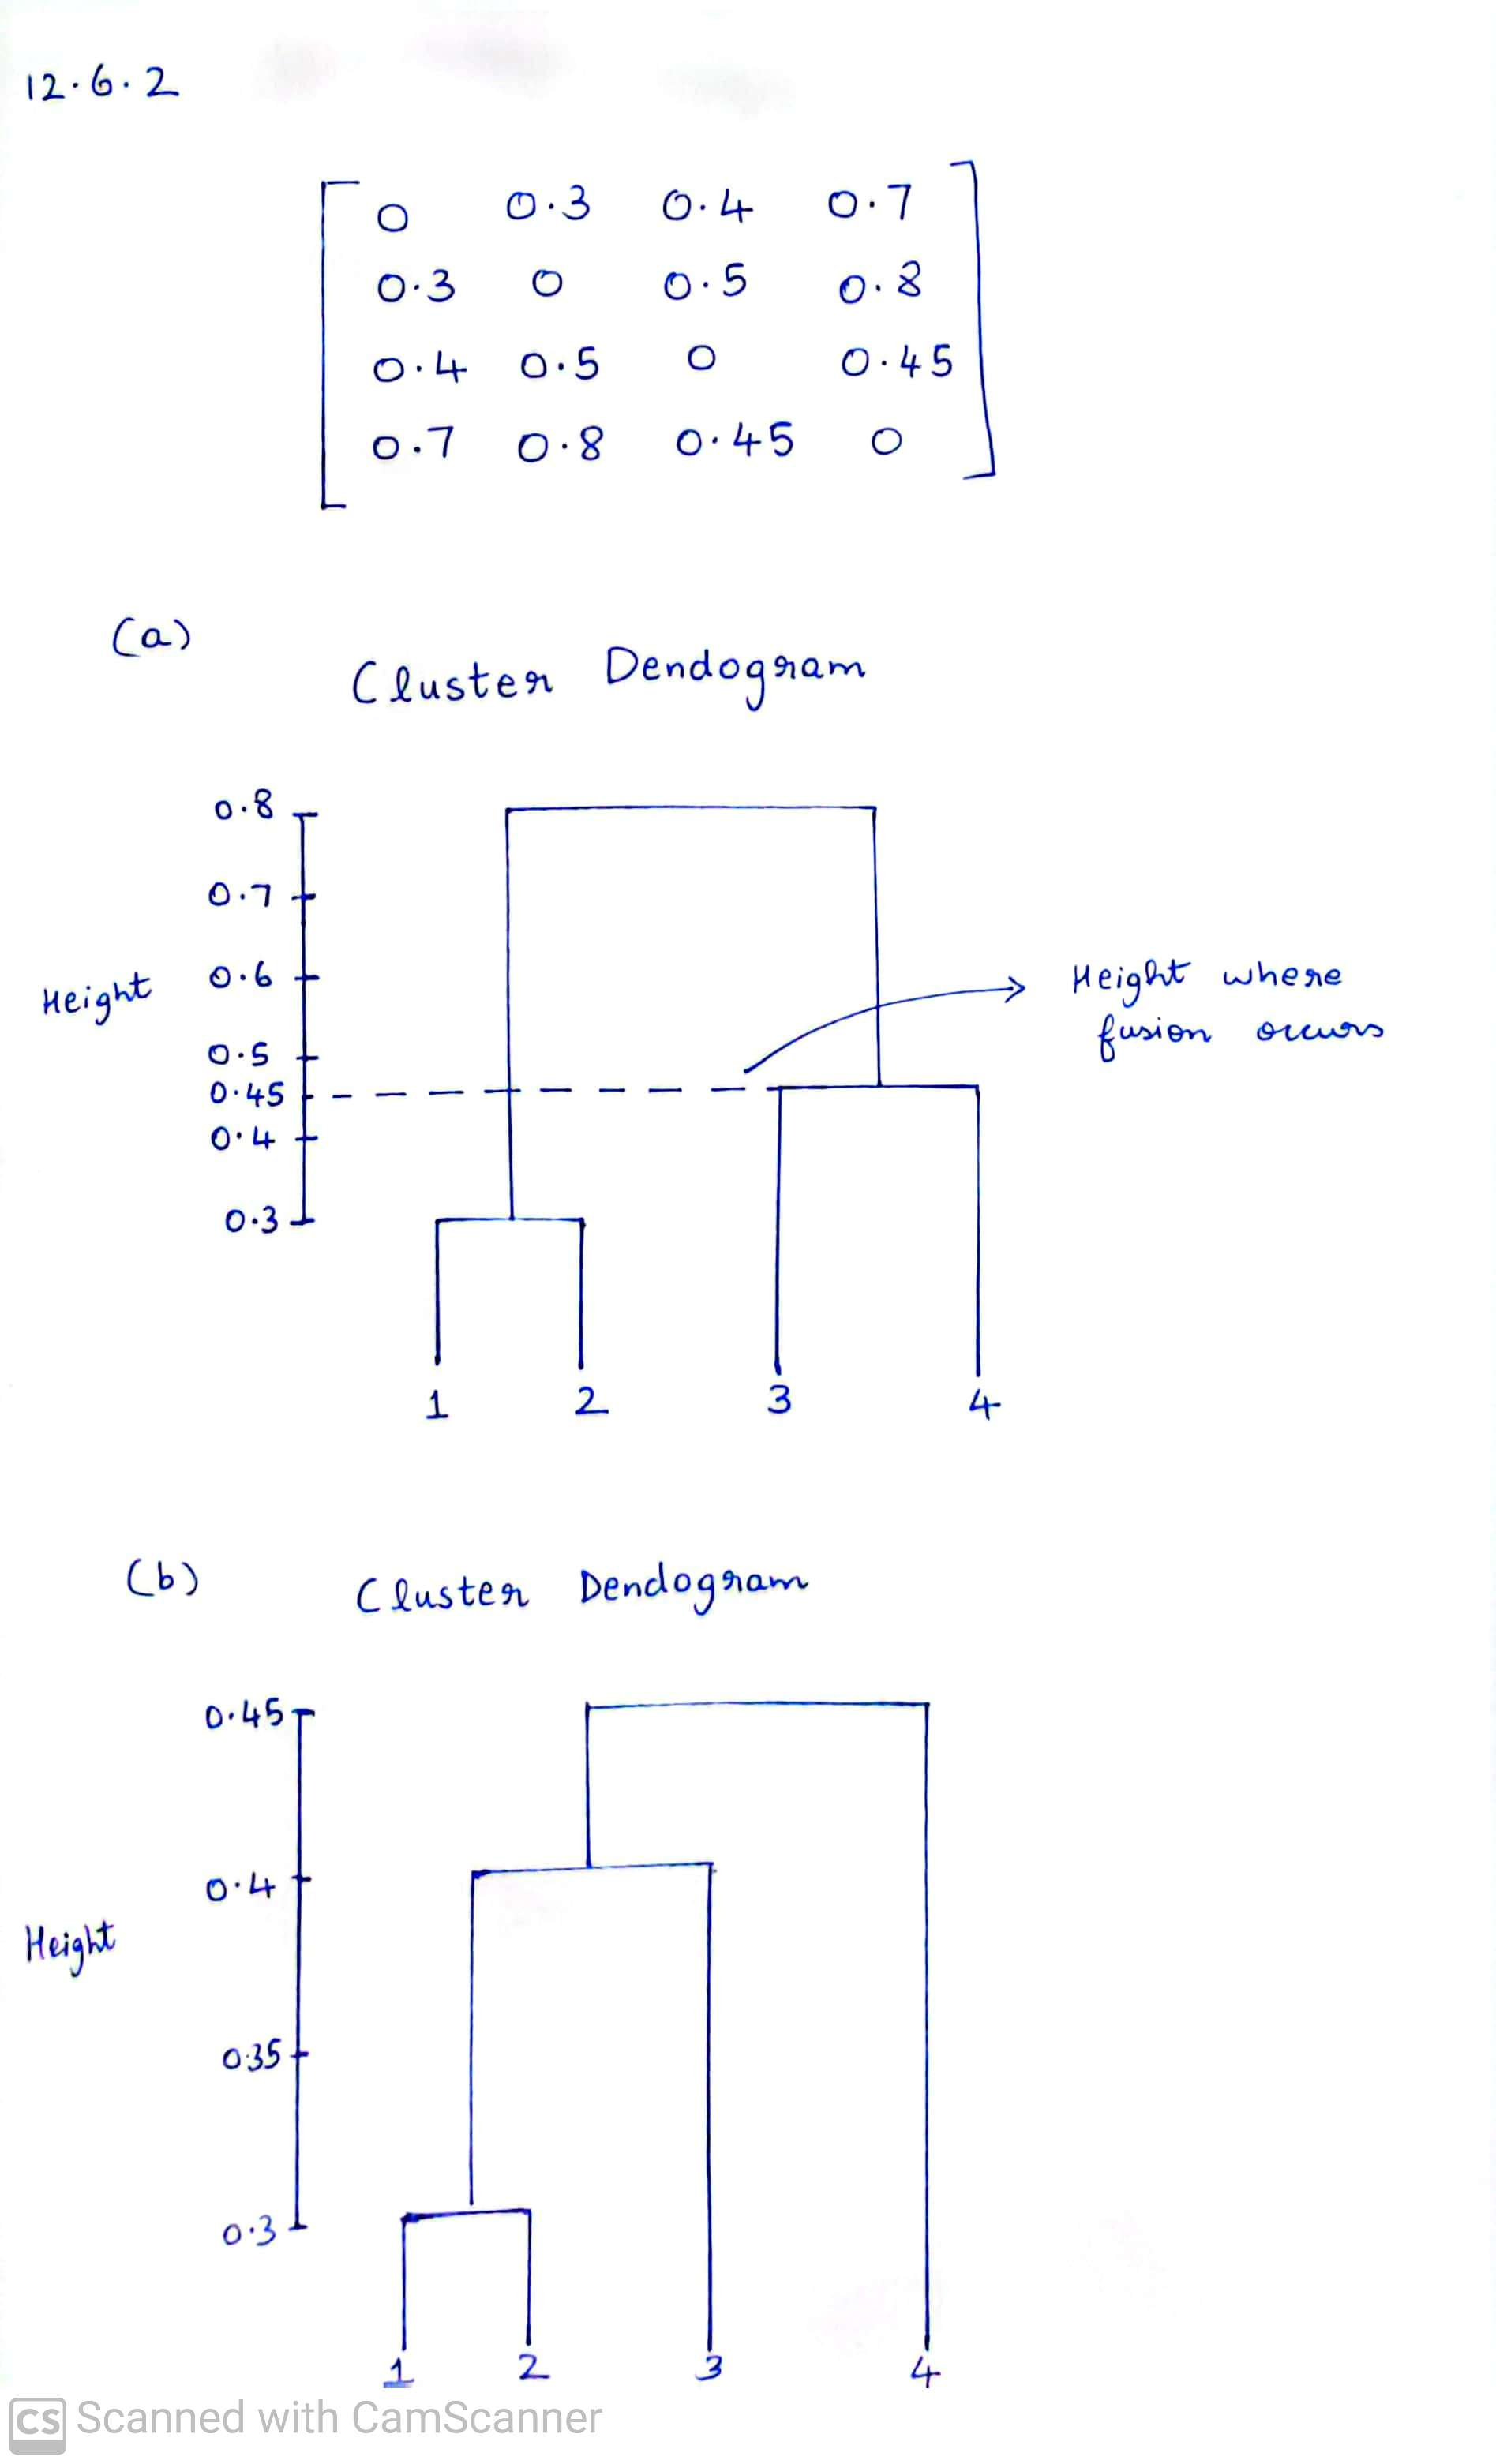

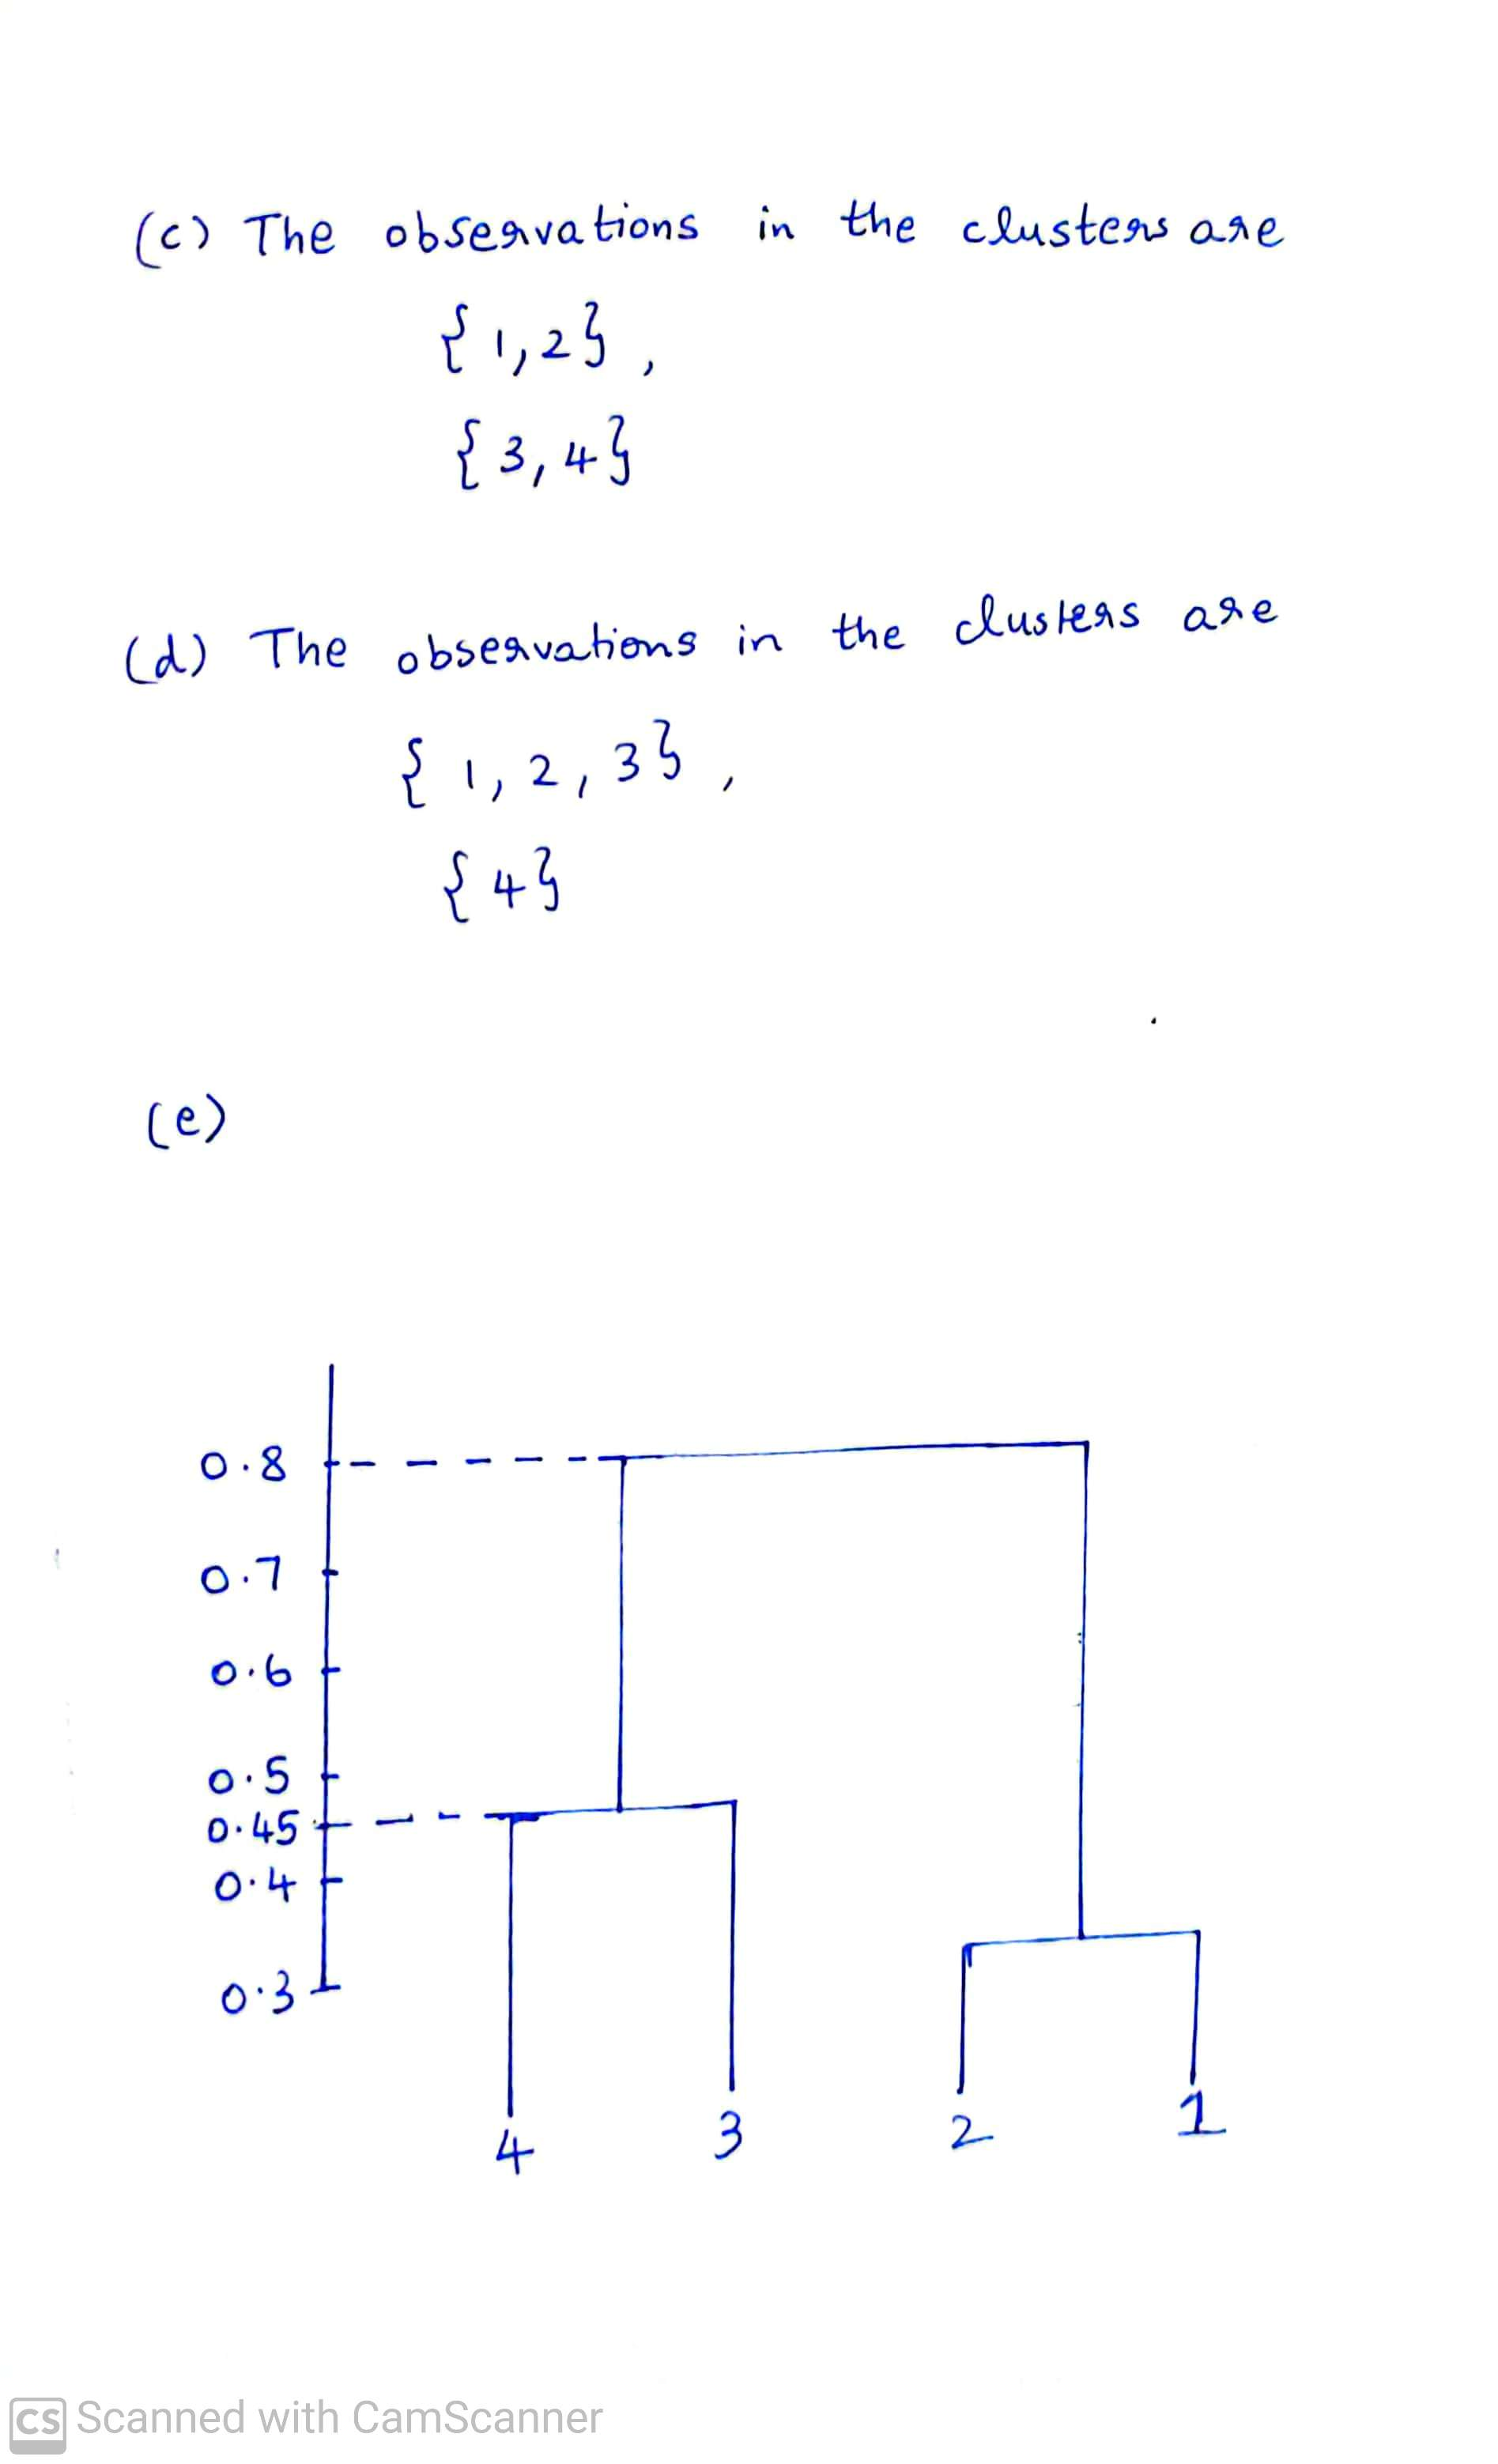

### References

#### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#### https://scikit-learn.org/stable/modules/model_evaluation.html
#### https://en.wikipedia.org/wiki/Multi-label_classification
#### https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics
#### https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/
#### https://support.sas.com/resources/papers/proceedings18/1689-2018.pdf
#### https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#### https://nlp.stanford.edu/IR-book/html/htmledition/single-link-and-complete-link-clustering-1.html
#### https://stats.stackexchange.com/questions/436114/interpreting-hamming-loss-for-multilabel-classification
#### https://datascience.stackexchange.com/questions/6987/can-you-explain-the-difference-between-svc-and-linearsvc-in-scikit-learn
